# <p style="font-size:36px;text-align:center"> <b>Predict The Price Of Book</b> </p>

<h6> Problem statement : </h6>
<p> Classify the given price based on evidence from text-based Synopsis literature. </p>

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#### 1. Load dataset.CSV into pandas dataframe

In [311]:
data_train = pd.read_csv(r"C:\Users\ASHOK\Documents\Data_Train.csv")
data_test = pd.read_csv(r"C:\Users\ASHOK\Documents\Data_Test.csv")

#### 2. Check first five raws

In [312]:
data_train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,? 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,? 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,? 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


In [313]:
data_test.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,? 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,? Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,? 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance


#### 3. How many datapoints and features

In [314]:
data_train.shape

(6237, 9)

In [315]:
data_test.shape

(1560, 8)

#### 4. What are the columns names

In [316]:
data_train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [317]:
data_test.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')

#### 5. How many datapoints for each class are present

In [318]:
data_train["Price"].value_counts()

299.00     108
399.00      85
449.00      59
295.00      49
319.00      48
          ... 
1850.00      1
1034.00      1
2799.00      1
1721.00      1
1065.18      1
Name: Price, Length: 1614, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

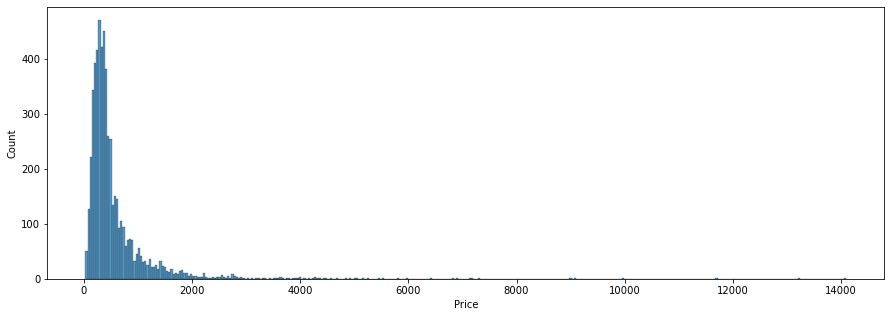

In [319]:
plt.figure(figsize = (15,5))
sns.histplot(x = "Price", data = data )

<AxesSubplot:xlabel='Price'>

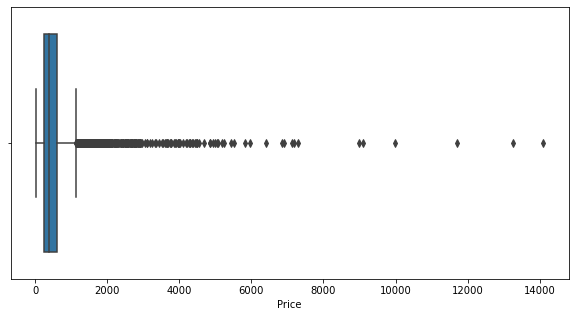

In [320]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Price", data = data)

#### 6. View summary

In [321]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [322]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


#### 7. Check null values

In [323]:
data_train.isnull().any()

Title           False
Author          False
Edition         False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
Price           False
dtype: bool

In [324]:
data_test.isnull().any()

Title           False
Author          False
Edition         False
Reviews         False
Ratings         False
Synopsis        False
Genre           False
BookCategory    False
dtype: bool

#### 8. Name of the different uniques values

In [325]:
data_train["Synopsis"].describe()

count                                                  6237
unique                                                 5549
top       A Tinkle Double Digest is two Tinkle Digests i...
freq                                                      8
Name: Synopsis, dtype: object

In [326]:
price_count = Counter(list(data_train['Synopsis']))
price_count.most_common(3)

[('A Tinkle Double Digest is two Tinkle Digests in one volume. These include the best stories of Tinkle over the years.',
  8),
 ('Calvin, cheeky, hyperactive and mischievous, and Hobbes, his cuddly toy tiger who, as far as Calvin is concerned is very much alive and kicking, are two of the most loveable and hilarious characters to grace the comic strip in years.',
  5),
 ('Coloring allows a child to relax and be comfortable while creating a piece of art. Children can fill in the figures and shapes on the page any way they choose, coloring helps a child practice holding a writing tool the correct way and aids in developing those tiny muscles in their hands, fingers, and wrist. This is a fun book which will directly reflect to developing the skills of your child.',
  4)]

In [327]:
data_test["Synopsis"].describe()

count                                                  1560
unique                                                 1519
top       A Guardian Pick for 2019\nThe People vs. Putin...
freq                                                      3
Name: Synopsis, dtype: object

In [328]:
price_count = Counter(list(data_test['Synopsis']))
price_count.most_common(3)

[("A Guardian Pick for 2019\nThe People vs. Putin.\nThe People vs. the Mafia.\nThe People vs. Wall Street.\nFor eight years Preet Bharara prosecuted some of the most high-stakes crimes in the world. Billion-dollar frauds. Terrorist attacks. Russian espionage. These were the cases that gripped America - and he was the man making sure people answered.\nIn Doing Justice Bharara lifts the lid on his time as America's prosecutor for justice, showing in intimate and explosive detail how the criminal justice system works from the inside. Spanning history, his own fabled cases and the actions of key players in the upper echelons of power, this is a book about what it means to make the right decisions at the toughest of moments, and about what the state of justice in America reveals about today.",
  3),
 ("The end is approaching ... Can Jack West unravel the ancient secrets of the Five Greatest Warriors and save the world?\nWith the end of the world fast approaching, Jack West Jnr must rebuild 

#### 9. Check duplicates

In [329]:
#find number of  duplicate.
print(sum(data_train.duplicated("Synopsis")))

688


In [330]:
data_train["Synopsis"].drop_duplicates().shape

(5549,)

In [331]:
duplicate = data_train.loc[data_train["Synopsis"].duplicated()]
duplicate.shape

(688, 9)

In [332]:
data_trai = data_train.drop_duplicates(subset=['Synopsis'])

In [333]:
data_trai.shape

(5549, 9)

In [334]:
data_test["Synopsis"].drop_duplicates().shape

(1519,)

In [335]:
duplicate = data_test.loc[data_test["Synopsis"].duplicated()]
duplicate.shape

(41, 8)

In [336]:
data_tes = data_test.drop_duplicates(subset=['Synopsis'])
data_tes.shape

(1519, 8)

In [337]:
import pickle
with open("55_apparel_data_train_After_Remove_Duplicates_Values", "wb") as f:
    pickle.dump(data_trai,f)

In [338]:
import pickle
with open("15k_apparel_data_train_After_Remove_Duplicates_Values", "wb") as f:
    pickle.dump(data_tes,f)

In [339]:
#the number of data_train points from 62K to 55K.
data_train = pd.read_pickle(r'55_apparel_data_train_After_Remove_Duplicates_Values')
data_train.shape

(5549, 9)

In [340]:
data_test = pd.read_pickle(r'15k_apparel_data_train_After_Remove_Duplicates_Values')
data_test.shape

(1519, 8)

# Text pre-processing

In [341]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [342]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [343]:
from tqdm import tqdm
import re
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')          # replace linebreak with \r\n
        sent = sent.replace('\\"', ' ')            # how to replace some content in mail template before send in C#
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)  # remove anything that is not a letter or number
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  # stop words
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [344]:
data_train["Title"] = preprocess_text(data_train["Title"].values)
data_train["Author"] = preprocess_text(data_train["Author"].values)
data_train["Edition"] = preprocess_text(data_train["Edition"].values)
data_train["Reviews"] = preprocess_text(data_train["Reviews"].values)
data_train["Ratings"] = preprocess_text(data_train["Ratings"].values)
data_train["Synopsis"] = preprocess_text(data_train["Synopsis"].values)
data_train["Genre"] = preprocess_text(data_train["Genre"].values)
data_train["BookCategory"] = preprocess_text(data_train["BookCategory"].values)

100%|██████████| 5549/5549 [00:00<00:00, 36631.91it/s]


In [345]:
data_test["Title"] = preprocess_text(data_test["Title"].values)
data_test["Author"] = preprocess_text(data_test["Author"].values)
data_test["Edition"] = preprocess_text(data_test["Edition"].values)
data_test["Reviews"] = preprocess_text(data_test["Reviews"].values)
data_test["Ratings"] = preprocess_text(data_test["Ratings"].values)
data_test["Synopsis"] = preprocess_text(data_test["Synopsis"].values)
data_test["Genre"] = preprocess_text(data_test["Genre"].values)
data_test["BookCategory"] = preprocess_text(data_test["BookCategory"].values)

100%|██████████| 1519/1519 [00:00<00:00, 47536.66it/s]


In [346]:
import pickle
with open("55_apparel_data_train_After_text_pre_processsing_Values", "wb") as f:
    pickle.dump(data_train,f)

In [347]:
import pickle
with open("15_apparel_data_test_After_text_pre_processsing_Values", "wb") as f:
    pickle.dump(data_test,f)

In [348]:
data_train = pd.read_pickle(r'55_apparel_data_train_After_text_pre_processsing_Values')
data_train.head(1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,prisoner gold hunters 3,chris kuzneski,paperback 10 mar 2016,4 0 5 stars,8 customer reviews,hunters return third brilliant novel sunday ti...,action adventure books,action adventure,220.0


In [349]:
data_test = pd.read_pickle(r'15_apparel_data_test_After_text_pre_processsing_Values')
data_test.head(1)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,complete sherlock holmes 2 boxes sets,sir arthur conan doyle,mass market paperback 1 oct 1986,4 4 5 stars,960 customer reviews,collection entire body work sherlock holmes se...,short stories books,crime thriller mystery


# Splitting data into Train and cross validation or test

In [350]:
X = data_train.drop(["Price"], axis = 1)
y = data_train["Price"].values
X_test = data_test

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.25)

In [353]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape)

(4161, 8) (4161,)
(1388, 8) (1388,)
(1519, 8)


## encoding categorical features: Title

In [354]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Title'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Title_bow=vectorizer.transform(X_train['Title'].values)
X_cv_Title_bow=vectorizer.transform(X_cv['Title'].values)
X_test_Title_bow=vectorizer.transform(X_test['Title'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Title_bow.shape,y_train.shape)
print("cv feature --",X_cv_Title_bow.shape,y_cv.shape)
print("test feature --",X_test_Title_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 6381) (4161,)
cv feature -- (1388, 6381) (1388,)
test feature -- (1519, 6381)


## encoding categorical features: Author

In [355]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Author'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Author_bow=vectorizer.transform(X_train['Author'].values)
X_cv_Author_bow=vectorizer.transform(X_cv['Author'].values)
X_test_Author_bow=vectorizer.transform(X_test['Author'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Author_bow.shape,y_train.shape)
print("cv feature --",X_cv_Author_bow.shape,y_cv.shape)
print("test feature --",X_test_Author_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 3984) (4161,)
cv feature -- (1388, 3984) (1388,)
test feature -- (1519, 3984)


## encoding categorical features: Edition

In [356]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Edition'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Edition_bow=vectorizer.transform(X_train['Edition'].values)
X_cv_Edition_bow=vectorizer.transform(X_cv['Edition'].values)
X_test_Edition_bow=vectorizer.transform(X_test['Edition'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Edition_bow.shape,y_train.shape)
print("cv feature --",X_cv_Edition_bow.shape,y_cv.shape)
print("test feature --",X_test_Edition_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 134) (4161,)
cv feature -- (1388, 134) (1388,)
test feature -- (1519, 134)


## encoding categorical features: Reviews

In [357]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Reviews'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Reviews_bow=vectorizer.transform(X_train['Reviews'].values)
X_cv_Reviews_bow=vectorizer.transform(X_cv['Reviews'].values)
X_test_Reviews_bow=vectorizer.transform(X_test['Reviews'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Reviews_bow.shape,y_train.shape)
print("cv feature --",X_cv_Reviews_bow.shape,y_cv.shape)
print("test feature --",X_test_Reviews_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 1) (4161,)
cv feature -- (1388, 1) (1388,)
test feature -- (1519, 1)


## encoding categorical features: Ratings

In [358]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Ratings'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Ratings_bow=vectorizer.transform(X_train['Ratings'].values)
X_cv_Ratings_bow=vectorizer.transform(X_cv['Ratings'].values)
X_test_Ratings_bow=vectorizer.transform(X_test['Ratings'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Ratings_bow.shape,y_train.shape)
print("cv feature --",X_cv_Ratings_bow.shape,y_cv.shape)
print("test feature --",X_test_Ratings_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 264) (4161,)
cv feature -- (1388, 264) (1388,)
test feature -- (1519, 264)


## encoding categorical features: Synopsis

In [359]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Synopsis'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Synopsis_bow=vectorizer.transform(X_train['Synopsis'].values)
X_cv_Synopsis_bow=vectorizer.transform(X_cv['Synopsis'].values)
X_test_Synopsis_bow=vectorizer.transform(X_test['Synopsis'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Synopsis_bow.shape,y_train.shape)
print("cv feature --",X_cv_Synopsis_bow.shape,y_cv.shape)
print("test feature --",X_test_Synopsis_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 35192) (4161,)
cv feature -- (1388, 35192) (1388,)
test feature -- (1519, 35192)


## encoding categorical features: Genre

In [360]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Genre'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_Genre_bow=vectorizer.transform(X_train['Genre'].values)
X_cv_Genre_bow=vectorizer.transform(X_cv['Genre'].values)
X_test_Genre_bow=vectorizer.transform(X_test['Genre'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_Genre_bow.shape,y_train.shape)
print("cv feature --",X_cv_Genre_bow.shape,y_cv.shape)
print("test feature --",X_test_Genre_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 380) (4161,)
cv feature -- (1388, 380) (1388,)
test feature -- (1519, 380)


## encoding categorical features: BookCategory

In [361]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['BookCategory'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_BookCategory_bow=vectorizer.transform(X_train['BookCategory'].values)
X_cv_BookCategory_bow=vectorizer.transform(X_cv['BookCategory'].values)
X_test_BookCategory_bow=vectorizer.transform(X_test['BookCategory'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_BookCategory_bow.shape,y_train.shape)
print("cv feature --",X_cv_BookCategory_bow.shape,y_cv.shape)
print("test feature --",X_test_BookCategory_bow.shape)
#print('the features are : ',teacher_prefix_feature_bow)

 after encoding in bow the size of :
 train feature -- (4161, 25) (4161,)
cv feature -- (1388, 25) (1388,)
test feature -- (1519, 25)


## Concatinating all the features

In [362]:
from scipy.sparse import hstack
X_train = hstack((X_train_Title_bow, X_train_Author_bow, X_train_Edition_bow, X_train_Reviews_bow, X_train_Ratings_bow, X_train_Synopsis_bow, X_train_Genre_bow, X_train_BookCategory_bow)).tocsr()
X_cv = hstack((X_cv_Title_bow, X_cv_Author_bow, X_cv_Edition_bow, X_cv_Reviews_bow, X_cv_Ratings_bow, X_cv_Synopsis_bow, X_cv_Genre_bow, X_cv_BookCategory_bow)).tocsr()
X_test = hstack((X_test_Title_bow, X_test_Author_bow, X_test_Edition_bow, X_test_Reviews_bow, X_test_Ratings_bow, X_test_Synopsis_bow, X_test_Genre_bow, X_test_BookCategory_bow)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape)

Final Data matrix
(4161, 46361) (4161,)
(1388, 46361) (1388,)
(1519, 46361)


# LinearRegression

In [364]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [366]:
#predict on the test and train data
y_cv_pred = lm.predict(X_cv)
y_train_pred = lm.predict(X_train)

### Regression metrics for model performance
Root-Mean-Square Error (RMSE)
Lower values of RMSE indicate better fit.

### Root-Mean-Square Error (RMSE) 

In [369]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_cv, y_cv_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 736.7016


### Mean_Squared_Error(MSE)

In [370]:
mean_squared_error(y_cv, y_cv_pred)

542729.2481791058

### Mean_Absolute_Percentage_Error(MAPE)

In [371]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_cv, y_cv_pred)

1.3757876957330817

### R^2 Square

In [374]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_cv, y_cv_pred)))

R2 Score value: -0.3814


In [375]:
print ("R2 Score value: {:.4f}".format(r2_score(y_train, y_train_pred)))

R2 Score value: 1.0000
